In [1]:
# required for importin modules from other directories
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 


import numpy as np
#from KNNRegressor import KNNRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

import config
from common import DataParser
from KNN.KNNRegressor import KNNRegressor

# ChunkViewer

How to

In [2]:
from math import floor
import numpy as np
from KNNRegressor import ChunkViewer

## Deprecated
def get_chunks(arr:np.ndarray, chunk_size:int):
    chunk_size = chunk_size
    samples = arr.shape[0]

    if chunk_size > samples:
        print("Can do it all in one chunk!")
        chunk_size = samples

    print(f"chunks in samples: floor({samples}/{chunk_size})={floor(samples/chunk_size)}")

    chunks = [(x*chunk_size, x*chunk_size+chunk_size) for x in range(floor(samples/chunk_size))]
    remainder = samples%chunk_size
    if remainder:
        chunks += [(chunks[-1][1], chunks[-1][1] + remainder)]
    return chunks

In [3]:
arr = np.zeros(10)
chunks = get_chunks(arr, 2)
chunks
for chunk in chunks:
    print(chunk)

chunks in samples: floor(10/2)=5
(0, 2)
(2, 4)
(4, 6)
(6, 8)
(8, 10)


In [4]:
arr = np.zeros(50).reshape(10,5)
arr[2:4,:] = 1
arr[4:6,:] = 2
arr[6:8,:] = 3
arr[8:,:] = 4

arr

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4.]])

In [5]:
np.array_split(arr, 3)

[array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]),
 array([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.]]),
 array([[3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.]])]

In [6]:
viewer = ChunkViewer(4, 10)
[x for x in viewer]

#[x for x in viewer]

[(0, 4), (4, 8), (8, 10)]

In [7]:
viewer = ChunkViewer(4, 10)
[x for x in viewer.generator()]

[(0, 4), (4, 8), (8, 10)]

In [8]:
viewer = ChunkViewer(4, 10)
for x in viewer.generator(arr):
    print(x)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]]
[[4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4.]]


# KNNRegressor

In [9]:
samples, values = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]], [0, 0.5, 2.5]
neigh = KNNRegressor(n_neighbors=2, p=1,debug=True)
neigh.fit(samples, values)
result = neigh.predict(np.array([[0, 0., .1]]))
print()
should_be = 0.25
print(f"Result: (should be {should_be})")
print(f"{result} -> {result==should_be}")

number of samples to predict for : 1
args
[[0.  0.  0.1]]
0
params
{'n_neighbors': 2, 'p': 1, 'weights': 'uniform', 'algorithm': 'brute'}
distances
[[0.1 0.6 2.4]]
neighbors
int64
[[0 1]]
uniform
neighbors
int64
[[0 1]]
subset (taken from axis=0):
[[0.  0.5]]

Result: (should be 0.25)
[0.25] -> [ True]


# House Prices Test

In [10]:
class Test:
    def __init__(self, val=1):
        self._att = val
    
    @property
    def att(self):
        return self._att

    @att.setter
    def att(self, val):
        self._att = val

a = Test()
print(a.att)
a.att = 2
a.att

1


2

In [11]:
x_train, y_train = DataParser.parse_test_housePrices(splitData=True)

k = 3
p = 1
weights = "uniform" #"distance"
reg = KNNRegressor(n_neighbors=k, p=p, debug=False)
reg.fit(x_train, y_train)
display(reg)

print("Predict")
y_pred, n = reg.predict(x_train.iloc[0:3,:].to_numpy(), ret_distances=2)
display(y_pred, n)

print("Make this look like the above^")
reg.chunk_size = 2
y_pred = reg.predict(x_train.iloc[0:3,:].to_numpy())
display(y_pred)

print("Nice")


"KNNRegressor: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform', 'algorithm': 'brute'}, chunk_size=5000"

Predict


array([163.33333333, 231.66666667, 205.        ])

array([[0, 4, 3],
       [3, 2, 1],
       [3, 2, 4]])

Make this look like the above^


array([163.33333333, 231.66666667, 205.        ])

Nice


# Moneyball

In [12]:
df = DataParser.parse_moneyball(splitData=False)

In [13]:
numeric_features = ["RS", "RA", "OBP", "SLG", "BA", "Playoffs", "G", "OOBP", "OSLG"]

In [14]:
df = df[numeric_features + ["W"]]
df.dropna(inplace=True)
x = df[numeric_features]
y = df["W"]
x, y

(      RS   RA    OBP    SLG     BA  Playoffs    G   OOBP   OSLG
 0    734  688  0.328  0.418  0.259         0  162  0.317  0.415
 1    700  600  0.320  0.389  0.247         1  162  0.306  0.378
 2    712  705  0.311  0.417  0.247         1  162  0.315  0.403
 3    734  806  0.315  0.415  0.260         0  162  0.331  0.428
 4    613  759  0.302  0.378  0.240         0  162  0.335  0.424
 ..   ...  ...    ...    ...    ...       ...  ...    ...    ...
 415  872  831  0.356  0.434  0.271         0  162  0.345  0.423
 416  809  838  0.338  0.426  0.262         0  161  0.355  0.427
 417  772  913  0.343  0.411  0.274         0  162  0.371  0.448
 418  945  859  0.361  0.479  0.293         1  162  0.346  0.459
 419  883  862  0.352  0.457  0.280         0  162  0.353  0.456
 
 [420 rows x 9 columns],
 0      81
 1      94
 2      93
 3      69
 4      61
        ..
 415    86
 416    75
 417    69
 418    95
 419    84
 Name: W, Length: 420, dtype: int64)

In [15]:
def split_XY(x, y):
    x_train, x_split, y_train, y_split = train_test_split(x, y, test_size=0.4)
    x_valid, x_test, y_valid, y_test = train_test_split(x_split, y_split, test_size=0.5)
    return x_train, x_valid, x_test, y_train, y_valid, y_test

def split_df(df):
    train, split = train_test_split(df, test_size=0.4)
    valid, test = train_test_split(split, test_size=0.5)
    return y_train, y_valid, y_test

def preprocess(df, scaler=None, ret_df=True):
    numeric_features = ["RS", "RA", "OBP", "SLG", "BA", "Playoffs", "G", "OOBP", "OSLG"]
    df = df[numeric_features + ["W"]]
    df.dropna(inplace=True)
    x = df[numeric_features]
    if scaler:
        x = scaler.fit_transform(x)
    y = df["W"]
    return x, y, df

def get_time(start, scale=1e-9):
    return (timer() - start ) * scale

In [16]:
from time import time_ns as timer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor as skKNN
from sklearn.model_selection import train_test_split
import pandas as pd


COLS = ["name", "param", "r2", "mse", "train_time", "inference_time"]

def experiment(df, models, scaler=None):
    x, y, df = preprocess(df, scaler, ret_df=True)
    x_train, x_valid, x_test, y_train, y_valid, y_test = split_XY(x, y)
    
    plt.figure(figsize=(10,8))


    results = pd.DataFrame(columns=COLS)


    for name, model in models.items():
        params = model.get_params()
        print(name)
        display(model)
        
        train_time = timer()
        model.fit(x_train, y_train)
        train_time = get_time(train_time)

        inference_time = timer()
        predictions = model.predict(x_valid)
        inference_time = get_time(inference_time)

        r2 = r2_score(y_valid, predictions)
        mse = mean_squared_error(y_valid, predictions)

        result = {
            "name": name,
            "param": params["n_neighbors"],
            "r2": r2,
            "mse": mse,
            "train_time": train_time,
            "inference_time": inference_time
        }
        results = results.append(result, ignore_index=True)
        display(result)

        marker = "x" if name=="my_knn" else "p"
        ls = "--" if name=="my_knn" else "-."
        plt.plot(range(len(predictions)), predictions, linestyle=ls, marker=marker, markersize=5, label=name);

    plt.plot(range(len(y_valid)), y_valid, linestyle="", marker="o", markersize=8, label="y_valid");
    plt.legend()
    return results

In [21]:
models = []

reg = KNNRegressor()
reg2 = KNNRegressor()
reg2.chunk_size = 200

knn = skKNN(algorithm="brute")
knn2 = skKNN(algorithm="kd_tree")
knn3 = skKNN(algorithm="ball_tree")

models = {"my_knn": reg, "my_knn_chunked": reg2, "sk_knn_brute": knn, "sk_knn_kd": knn2, "sk_knn_ball": knn3}
for x in models:
    display(str(x)+": ")
    display(models[x].get_params())
    if not x == "sk_knn_ball":
        print("_"*30)


'my_knn: '

{'n_neighbors': 5, 'p': 2, 'weights': 'uniform', 'algorithm': 'brute'}

______________________________


'my_knn_chunked: '

{'n_neighbors': 5, 'p': 2, 'weights': 'uniform', 'algorithm': 'brute'}

______________________________


'sk_knn_brute: '

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

______________________________


'sk_knn_kd: '

{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

______________________________


'sk_knn_ball: '

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

______________________________


my_knn


"KNNRegressor: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform', 'algorithm': 'brute'}, chunk_size=5000"

{'name': 'my_knn',
 'param': 5,
 'r2': 0.8560523885484006,
 'mse': 18.710476190476193,
 'train_time': 0.000497,
 'inference_time': 0.003697}

my_knn_chunked


"KNNRegressor: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform', 'algorithm': 'brute'}, chunk_size=200"

{'name': 'my_knn_chunked',
 'param': 5,
 'r2': 0.8560523885484006,
 'mse': 18.710476190476193,
 'train_time': 0.0006950000000000001,
 'inference_time': 0.003252}

sk_knn_brute


KNeighborsRegressor(algorithm='brute')

{'name': 'sk_knn_brute',
 'param': 5,
 'r2': 0.8560523885484006,
 'mse': 18.710476190476193,
 'train_time': 0.004749000000000001,
 'inference_time': 0.0051470000000000005}

sk_knn_kd


KNeighborsRegressor(algorithm='kd_tree')

{'name': 'sk_knn_kd',
 'param': 5,
 'r2': 0.8560523885484006,
 'mse': 18.710476190476193,
 'train_time': 0.002657,
 'inference_time': 0.003066}

sk_knn_ball


KNeighborsRegressor(algorithm='ball_tree')

{'name': 'sk_knn_ball',
 'param': 5,
 'r2': 0.8560523885484006,
 'mse': 18.710476190476193,
 'train_time': 0.003052,
 'inference_time': 0.004166}

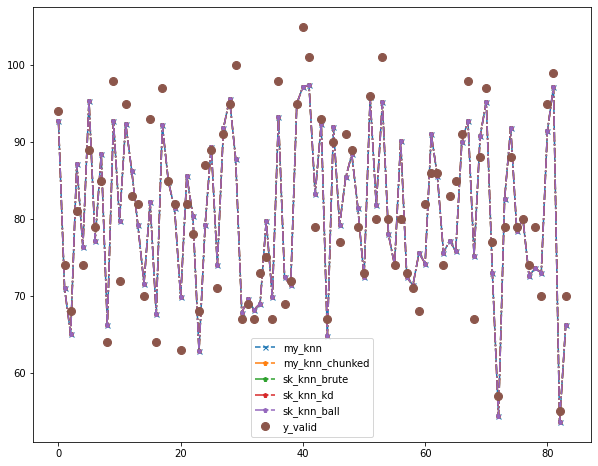

In [22]:
scaler = None #StandardScaler()
results = experiment(df, models, scaler=scaler)

In [ ]:
results